In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('Hackathon_Working_Data.csv')

In [43]:
data.shape

(26985, 14)

In [44]:
data.describe()

,DAY,BILL_AMT,QTY,VALUE,PRICE
count,26985.000000,26985.000000,26985.000000,26985.000000,26985.000000
mean,15.167019,278.754206,4.105021,67.808551,52.812982
std,8.956057,541.398504,95.666947,118.005978,84.987730
min,1.000000,0.000000,0.500000,0.000000,0.000000
25%,7.000000,40.000000,1.000000,10.000000,10.000000
50%,14.000000,111.000000,1.000000,30.000000,22.000000
75%,23.000000,280.000000,2.000000,80.000000,64.000000
max,31.000000,7292.000000,12000.000000,3150.000000,3150.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26985 entries, 0 to 26984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MONTH      26985 non-null  object 
 1   STORECODE  26985 non-null  object 
 2   DAY        26985 non-null  int64  
 3   BILL_ID    26985 non-null  object 
 4   BILL_AMT   26985 non-null  float64
 5   QTY        26985 non-null  float64
 6   VALUE      26985 non-null  float64
 7   PRICE      26985 non-null  float64
 8   GRP        26985 non-null  object 
 9   SGRP       26985 non-null  object 
 10  SSGRP      26985 non-null  object 
 11  CMP        26985 non-null  object 
 12  MBRD       26985 non-null  object 
 13  BRD        26985 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.9+ MB


In [46]:
data.tail()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
26980,M3,N10,31,T5999,10.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,NON-SALT CRACKER,NON-SALT CRACKER,PARLE PRODS,PARLE KRACK JACK,PARLE KRACK JACK
26981,M3,N10,31,T6007,88.0,1.0,10.0,10.0,BISCUITS - CORE & NON CORE,MARIE,MARIE,PARLE PRODS,PARLE MARIE,PARLE MARIE
26982,M3,N10,31,T6007,88.0,2.0,20.0,10.0,BISCUITS - CORE & NON CORE,GLUCOSE,GLUCOSE,PARLE PRODS,PARLE-G,PARLE-G
26983,M3,N10,31,T6007,88.0,1.0,58.0,58.0,CLEANERS - GLASS,LIQUIDS,LIQUIDS,RECKITT BENCKISER,COLIN,COLIN
26984,M3,N10,31,T6013,15.0,1.0,15.0,15.0,BISCUITS - CORE & NON CORE,SWEET/COOKIES,SWEET/COOKIES,SAJ INDS,BISK FARM,BISK FARM JUST GINGER


In [47]:
len(data['GRP'].unique())

80

In [48]:
data['UNIQUE_BILL_ID'] = data['STORECODE'] + data['BILL_ID']

In [49]:
data.head()

,MONTH,STORECODE,DAY,BILL_ID,BILL_AMT,QTY,VALUE,PRICE,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_BILL_ID
0,M1,N1,4,T375,225.0,1.0,225.0,225.0,BUTTER MARGR (4/94),BUTTER,SALTED,G C M M F,AMUL,AMUL,N1T375
1,M1,N1,4,T379,95.0,1.0,95.0,95.0,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,CONFECTIONERY - ECLAIRS,PARLE PRODS,MELODY,MELODY CHOCOLATY,N1T379
2,M1,N1,4,T381,10.0,1.0,10.0,10.0,CHOCOLATE,CHOCOLATE PANNED,CHOCOLATE PANNED,MONDELEZ INTERNATIONAL,CADBURY SHOTS,CADBURY SHOTS,N1T381
3,M1,N1,4,T382,108.0,1.0,108.0,108.0,PACKAGED TEA,MAIN PACKS,MAIN PACKS,GUJ TEA PROCESSORS,WAGH BAKRI,WAGH BAKRI INSTANT,N1T382
4,M1,N1,4,T384,19.0,1.0,19.0,19.0,ALL IODISED SALT,POWDERED SALT,POWDERED SALT,TATA CHEM,TATA,TATA SALT,N1T384


In [50]:
dataset= data.copy()
dataset.isnull().sum()

MONTH             0
STORECODE         0
DAY               0
BILL_ID           0
BILL_AMT          0
QTY               0
VALUE             0
PRICE             0
GRP               0
SGRP              0
SSGRP             0
CMP               0
MBRD              0
BRD               0
UNIQUE_BILL_ID    0
dtype: int64

In [51]:
is_any_missing_data=dataset.isna().any().any()
is_any_missing_data

False

In [52]:
dataset.duplicated().sum()

90

In [53]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

In [54]:
dataset.dtypes

MONTH              object
STORECODE          object
DAY                 int64
BILL_ID            object
BILL_AMT          float64
QTY               float64
VALUE             float64
PRICE             float64
GRP                object
SGRP               object
SSGRP              object
CMP                object
MBRD               object
BRD                object
UNIQUE_BILL_ID     object
dtype: object

In [55]:
def remove_character(column):
    return column.str.replace('M', '')

dataset['MONTH'] = remove_character(dataset['MONTH'])
dataset['MONTH'] = dataset['MONTH'].astype(int)

In [56]:
label_encoder = LabelEncoder()
dataset['STORECODE'] = label_encoder.fit_transform(dataset['STORECODE']) + 1

In [57]:
numerical_variables = [feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print('Number of numberical variables:', len(numerical_variables))

dataset[numerical_variables].sample(1)

Number of numberical variables: 7


,MONTH,STORECODE,DAY,BILL_AMT,QTY,VALUE,PRICE
12209,2,6,25,50.0,1.0,50.0,50.0


In [58]:
days=dataset['DAY'].unique()
print('days ',sorted(days))

days  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [59]:
unique_storecodes = dataset['STORECODE'].unique()
sorted_unique_storecodes = sorted(unique_storecodes)
print('storecodes ',sorted_unique_storecodes)

storecodes  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [60]:
categorial_variables = [feature for feature in dataset.columns if dataset[feature].dtypes=='O']
print('Number of categorial variables:', len(categorial_variables))

dataset[categorial_variables].sample(1)

Number of categorial variables: 8


,BILL_ID,GRP,SGRP,SSGRP,CMP,MBRD,BRD,UNIQUE_BILL_ID
7848,T548,MILK POWDERS,DAIRY WHITNERS,DAIRY WHITNERS,NESTLE INDIA,EVERYDAY,EVERYDAY DAIRY WHITNER,N2T548


/var/folders/h8/t6lhv6xn2rb77q_875grd1400000gn/T/ipykernel_9242/3044113233.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True, label=feature)
/Users/sa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/h8/t6lhv6xn2rb77q_875grd1400000gn/T/ipykernel_9242/3044113233.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[feature], shade=True, label=feature)
/Users/sa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be remov

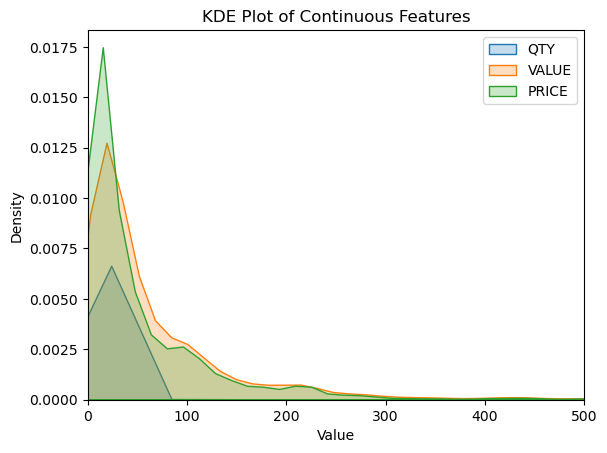

In [61]:
continuous_features = ['QTY', 'VALUE', 'PRICE']
for feature in continuous_features:
    sns.kdeplot(data[feature], shade=True, label=feature)
plt.title('KDE Plot of Continuous Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0, 500)
plt.legend()
plt.show()

In [62]:
sales_per_store = dataset.groupby('STORECODE')['VALUE'].sum().reset_index()
sales_per_store.sort_values(by='VALUE',ascending=False,inplace=True)
sales_per_store.head(3)

,STORECODE,VALUE
7,8,273296.65
9,10,250777.03
5,6,237242.00


In [63]:
Average_sales_per_store = dataset.groupby('STORECODE')['VALUE'].mean().reset_index()
Average_sales_per_store.sort_values(by='VALUE',ascending=False,inplace=True)
Average_sales_per_store.head(3)

,STORECODE,VALUE
2,3,166.748304
9,10,164.336193
8,9,103.302449


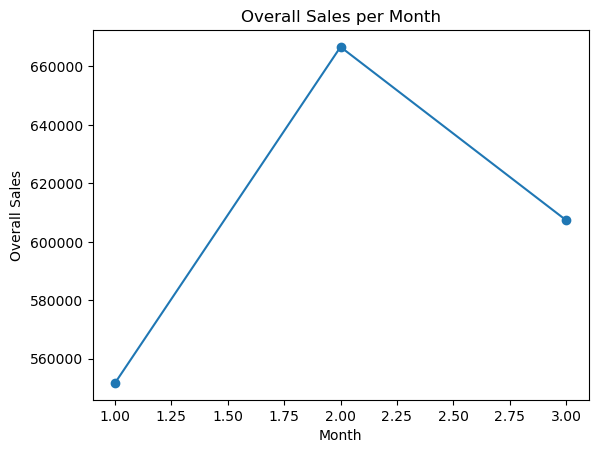

In [64]:
Overall_sales_per_month= dataset.groupby('MONTH')['VALUE'].sum()
Overall_sales_per_month.plot(kind='line', marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Overall Sales')
plt.title('Overall Sales per Month')
plt.show()

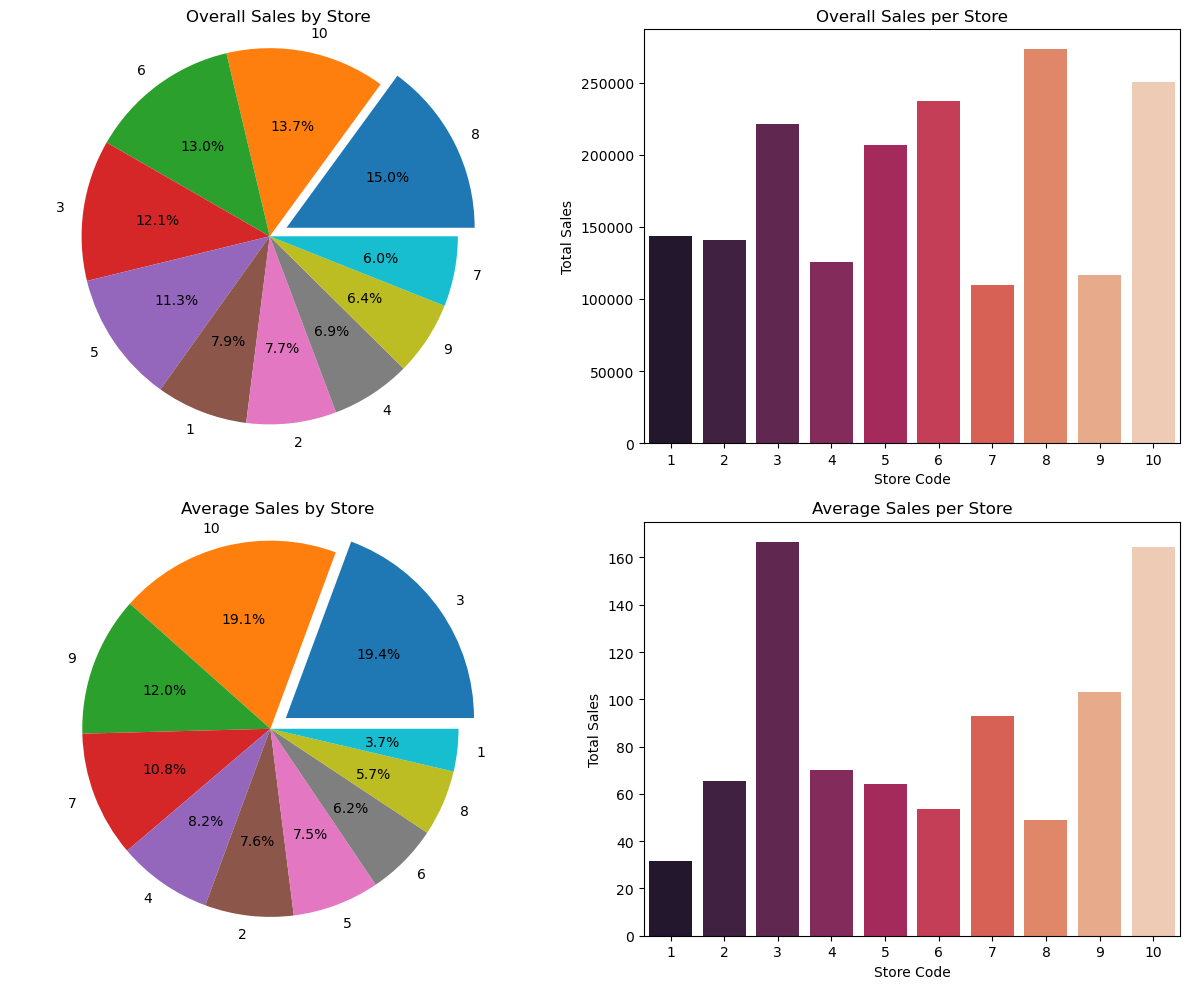

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
explode = [0.1, 0,0,0,0,0,0,0,0,0]
axes[0, 0].pie(sales_per_store['VALUE'], labels=sales_per_store['STORECODE'],explode=explode, autopct='%1.1f%%')
axes[0, 0].set_title('Overall Sales by Store')
axes[0, 0].axis('equal')
sns.barplot(x='STORECODE', y='VALUE', data=sales_per_store, palette="rocket", ax=axes[0, 1])
axes[0, 1].set_title('Overall Sales per Store')
axes[0, 1].set_xlabel('Store Code')
axes[0, 1].set_ylabel('Total Sales')
axes[1, 0].pie(Average_sales_per_store['VALUE'], labels=Average_sales_per_store['STORECODE'],explode=explode, autopct='%1.1f%%')
axes[1, 0].set_title('Average Sales by Store')
axes[1, 0].axis('equal')
sns.barplot(x='STORECODE', y='VALUE', data=Average_sales_per_store, palette="rocket", ax=axes[1, 1])
axes[1, 1].set_title('Average Sales per Store')
axes[1, 1].set_xlabel('Store Code')
axes[1, 1].set_ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [66]:
sales_by_month_day = dataset.groupby(['MONTH', 'DAY'])['VALUE'].sum().reset_index()


/Users/sa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sa/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


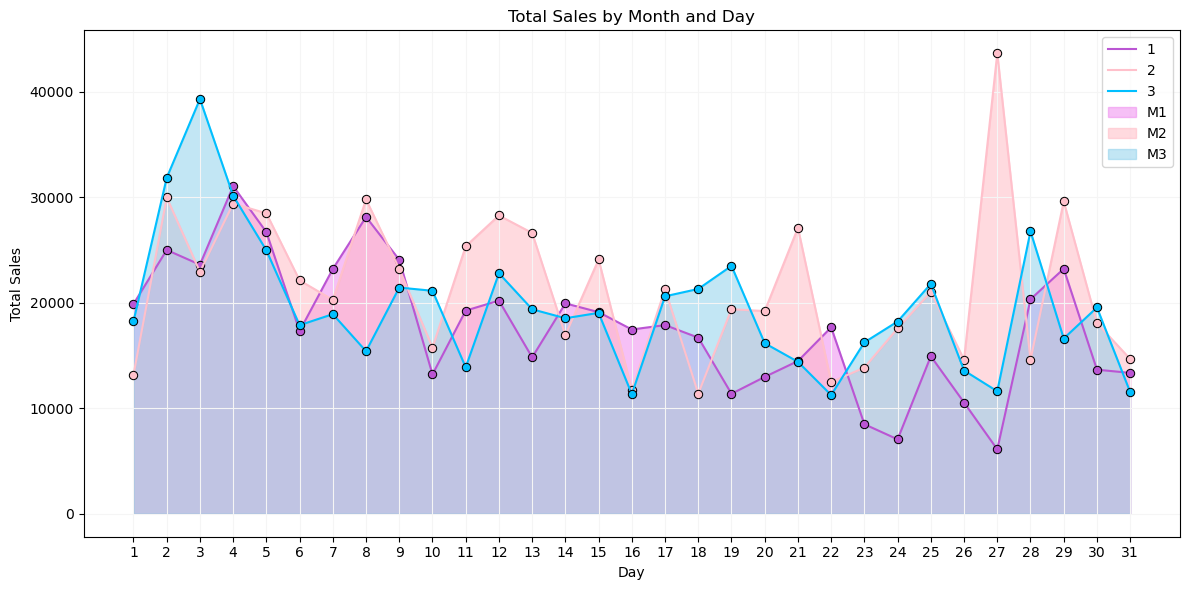

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))
palettes=['mediumorchid','pink','deepskyblue']
sns.lineplot(data=sales_by_month_day, x='DAY', y='VALUE', hue='MONTH', marker='o',markeredgecolor='black',palette=palettes, ax=ax)
ax.set_xlabel('Day')
ax.set_ylabel('Sales')
ax.set_title('Sales by Day, Month-wise')
ax.legend(title='Month')
ax.set_xticks(range(1, max(dataset['DAY']) + 1)) 

sales_by_month_day_m1 = sales_by_month_day[sales_by_month_day['MONTH'] == 1]
sales_by_month_day_m2 = sales_by_month_day[sales_by_month_day['MONTH'] == 2]
sales_by_month_day_m3 = sales_by_month_day[sales_by_month_day['MONTH'] == 3]

ax.fill_between(sales_by_month_day_m1['DAY'], sales_by_month_day_m1['VALUE'], alpha=0.5, label='M1',color="violet")
ax.fill_between(sales_by_month_day_m2['DAY'], sales_by_month_day_m2['VALUE'], alpha=0.5, label='M2',color="lightpink")
ax.fill_between(sales_by_month_day_m3['DAY'], sales_by_month_day_m3['VALUE'], alpha=0.5, label='M3',color="skyblue")
ax.set_xlabel('Day')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales by Month and Day')
ax.legend()
ax.grid(True,color='whitesmoke')
plt.tight_layout()
plt.show()

In [68]:
total_products_per_store= dataset.groupby('STORECODE')['QTY'].sum().sort_values(ascending=False).reset_index()

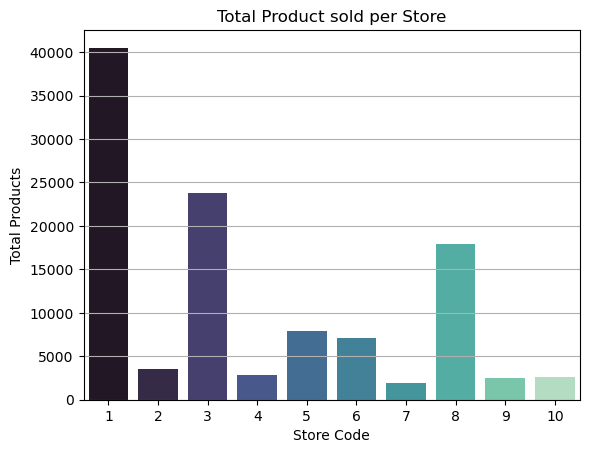

In [69]:
sns.barplot( x='STORECODE', y='QTY',data=total_products_per_store, palette = "mako")
plt.title('Total Product sold per Store')
plt.xlabel('Store Code')
plt.ylabel('Total Products')
plt.grid(axis='y')
plt.show()

In [70]:
merged_data = pd.merge(total_products_per_store, sales_per_store, on='STORECODE')
merged_data.set_index('STORECODE', inplace=True)
merged_data.reset_index(inplace=True)

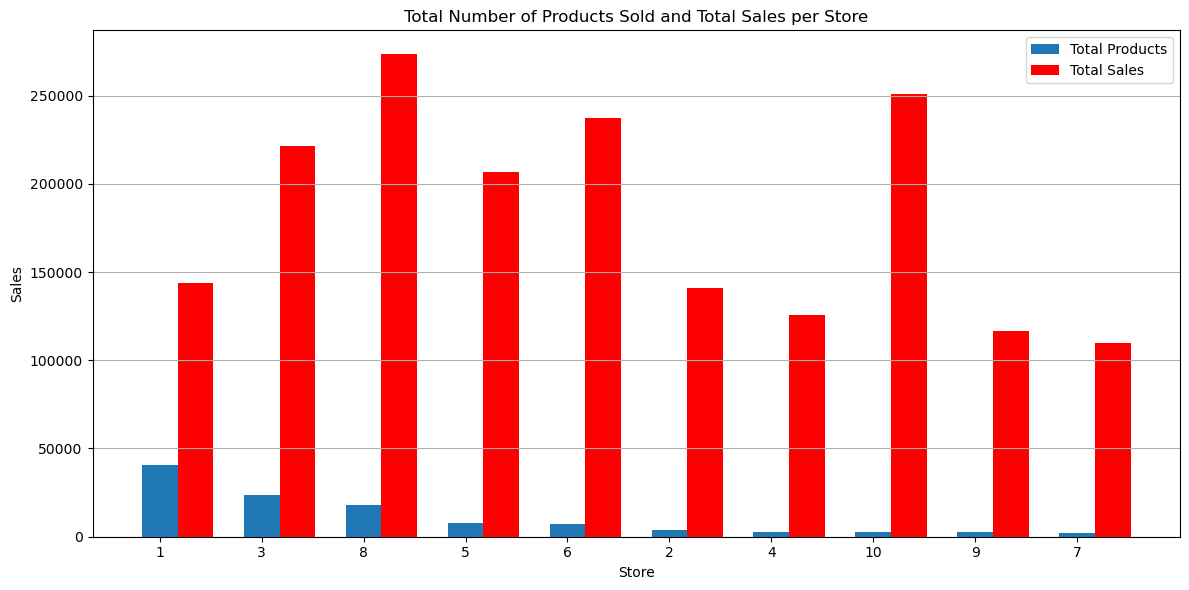

In [71]:
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(merged_data))
bar1 = plt.bar(x, merged_data['QTY'], bar_width, label='Total Products')
bar2 = plt.bar(merged_data.index + bar_width, merged_data['VALUE'], bar_width, label='Total Sales', color='red')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.title('Total Number of Products Sold and Total Sales per Store')
plt.xticks(x,merged_data['STORECODE'])
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

In [72]:
orders_per_store_per_day_per_month = dataset.groupby(['STORECODE', 'MONTH', 'DAY'])['UNIQUE_BILL_ID'].nunique().reset_index(name='Total_Number_of_Orders')

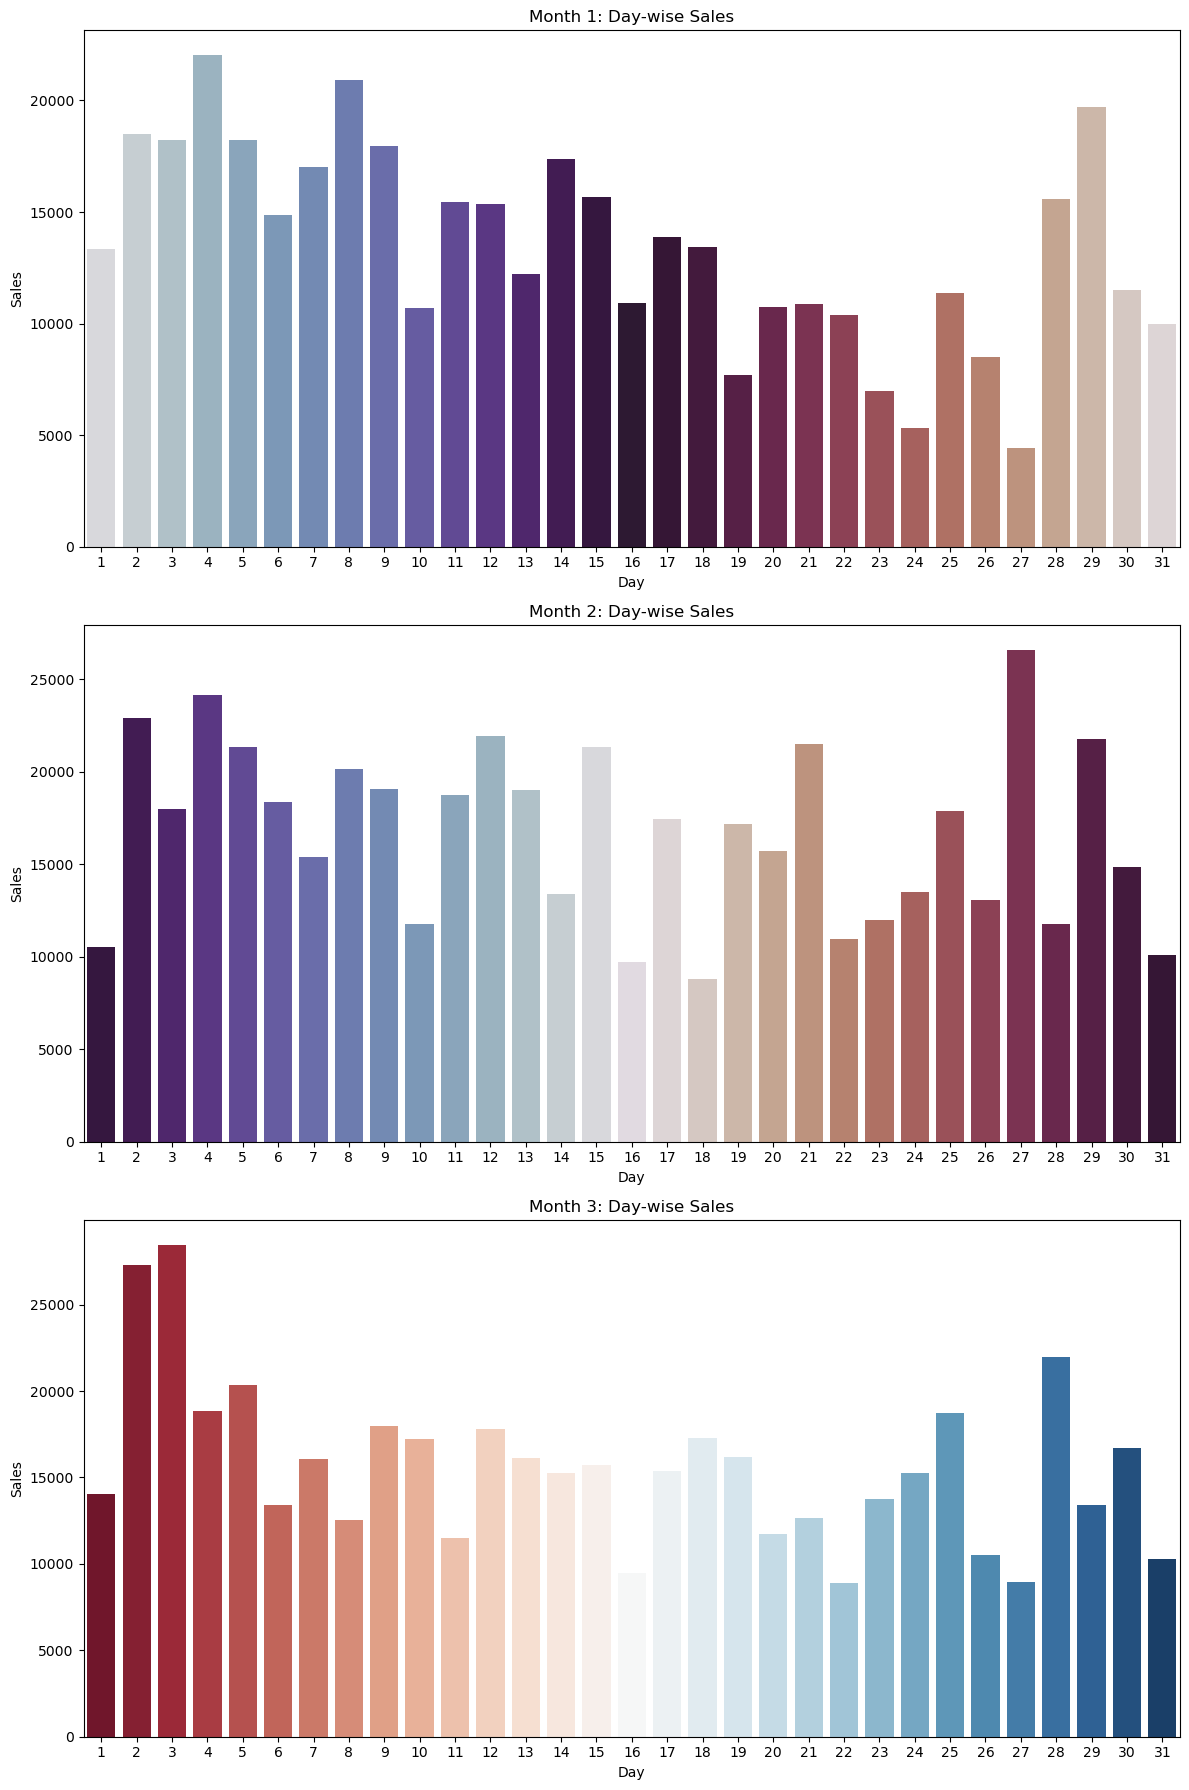

In [73]:
months = dataset['MONTH'].unique()

plt.figure(figsize=(12, 6 * len(months)))
palettes=['Greens','twilight','twilight_shifted','RdBu']
for i, month in enumerate(months, 1):
    month_data = dataset[dataset['MONTH'] == month]
    day_sales_month = month_data.groupby('DAY')['PRICE'].sum().reset_index()
    
    plt.subplot(len(months), 1, i)
    sns.barplot(x='DAY', y='PRICE', data=day_sales_month,palette=palettes[i])
    plt.xlabel('Day')
    plt.ylabel('Sales')
    plt.title(f"Month {month}: Day-wise Sales")

plt.tight_layout()
plt.show()

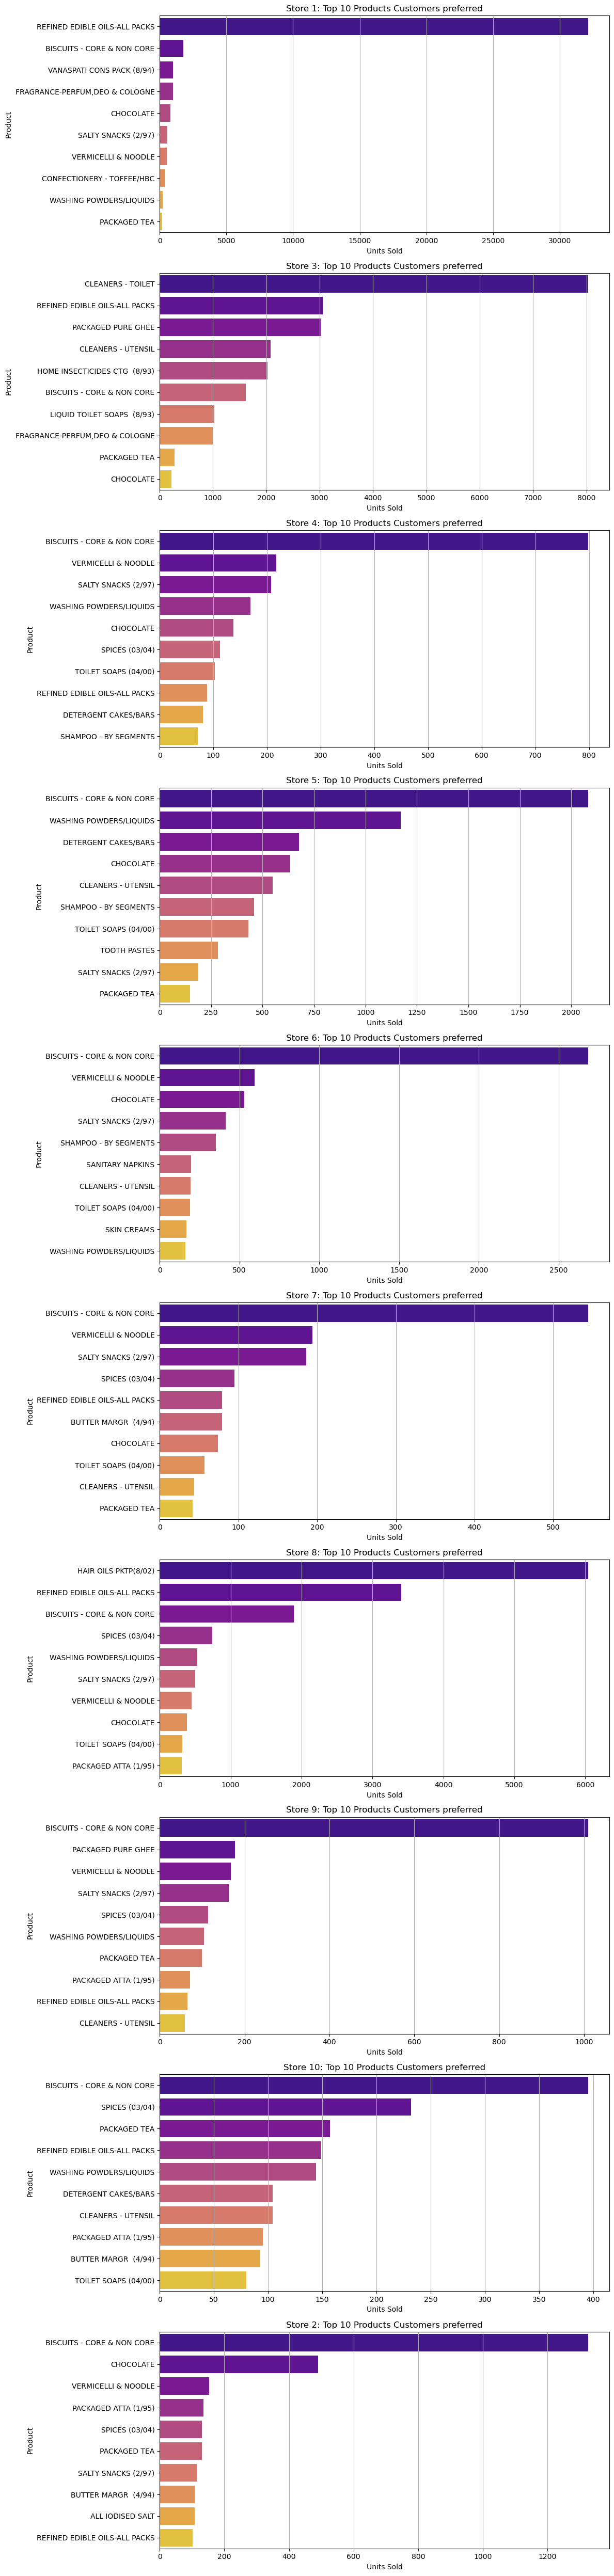

In [74]:
stores = dataset['STORECODE'].unique()

plt.figure(figsize=(12, 5 * len(stores)))
palettes = ['hls', 'RdPu', 'Blues', 'Greens']

for i, store in enumerate(stores, 1):
    store_data = dataset[dataset['STORECODE'] == store]
    most_bought_product_in_each_store = store_data.groupby(['STORECODE', 'GRP'])['QTY'].sum().sort_values(ascending=False).reset_index()
    plt.subplot(len(stores), 1, i)
    sns.barplot(x='QTY', y='GRP', data=most_bought_product_in_each_store[:10], palette='plasma')
    plt.grid(axis='x')
    plt.xlabel('Units Sold')
    plt.ylabel('Product')
    plt.title(f"Store {store}: Top 10 Products Customers preferred")
plt.tight_layout()
plt.show()

In [75]:
most_bought_product_in_each_store = dataset.groupby(['STORECODE', 'GRP'])['QTY'].sum().sort_values(ascending=False).reset_index()
most_bought_product_in_each_store.head()

,STORECODE,GRP,QTY
0,1,REFINED EDIBLE OILS-ALL PACKS,32108.0
1,3,CLEANERS - TOILET,8027.0
2,8,HAIR OILS PKTP(8/02),6037.0
3,8,REFINED EDIBLE OILS-ALL PACKS,3403.0
4,3,REFINED EDIBLE OILS-ALL PACKS,3057.0


In [76]:
top_3_products = most_bought_product_in_each_store.groupby("STORECODE").head(3)
top_3_products=top_3_products.sort_values(by='STORECODE', ascending=True)

In [77]:
prd_number=[]
prd_to_assign=['P1','P2','P3']
for i in range(0,int(len(top_3_products.index)/3)):
    prd_number.extend(prd_to_assign)
top_3 =top_3_products.copy()
top_3['PRD'] = prd_number
top_3.head()

,STORECODE,GRP,QTY,PRD
0,1,REFINED EDIBLE OILS-ALL PACKS,32108.0,P1
16,1,VANASPATI CONS PACK (8/94),1019.0,P2
11,1,BISCUITS - CORE & NON CORE,1765.0,P3
33,2,CHOCOLATE,491.0,P1
13,2,BISCUITS - CORE & NON CORE,1325.0,P2


In [78]:
top_3_products_in_each_store=[]
top_3_products_in_each_store = top_3['GRP'].tolist()

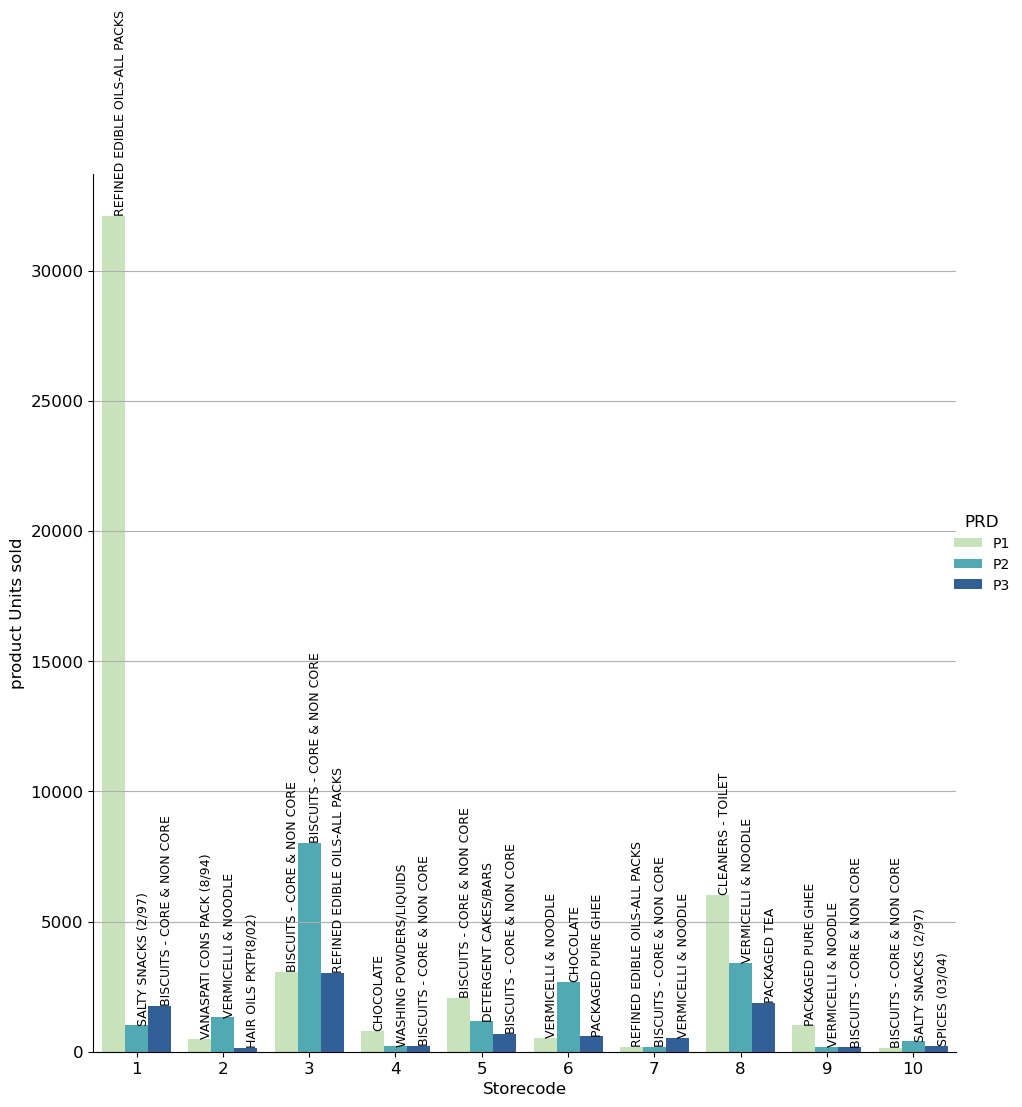

In [79]:
catplot = sns.catplot(x='STORECODE', y='QTY', hue='PRD', data=top_3, kind='bar', height=6, aspect=2,palette='YlGnBu')
ax1 = catplot.ax
annotations = top_3_products_in_each_store
for i, bar in enumerate(ax1.patches): 
    x_coord = bar.get_x() + bar.get_width() / 2 
    y_coord = bar.get_height() + 5 
    annotation_text = annotations[i]
    ax1.text(x_coord,y_coord, annotation_text,rotation=90,fontsize=9, ha='left', va='bottom')
ax1.set_xlabel('Storecode', fontsize=12)
ax1.set_ylabel('product Units sold', fontsize=12)
legend = catplot._legend
legend.set_title('PRD')
legend.get_title().set_fontsize(12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.gcf().set_size_inches(10, 10)
plt.show()

In [80]:
top_grp_N1 = top_3_products[top_3_products['STORECODE'] == 1]['GRP'].iloc[0]
print(f"Top GRP for store N1: {top_grp_N1}")

Top GRP for store N1: REFINED EDIBLE OILS-ALL PACKS
